Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [70]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [71]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

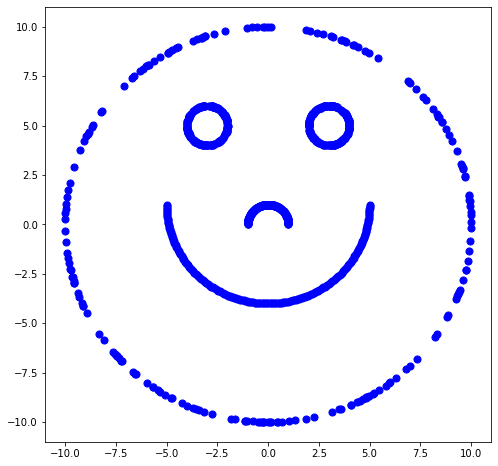

In [72]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

#### using sklearn(K=4)

In [73]:
X.shape

(1000, 2)

In [74]:
from sklearn.cluster import KMeans

In [152]:
model=KMeans(n_clusters=4,verbose=True)

In [153]:
labels=(model.fit_predict(X))

Initialization complete
Iteration 0, inertia 13344.033392816407
Iteration 1, inertia 11481.573079659267
Iteration 2, inertia 11234.794743670787
Iteration 3, inertia 11160.735019988082
Iteration 4, inertia 11137.232537108304
Iteration 5, inertia 11129.327673458012
Iteration 6, inertia 11119.148609662036
Iteration 7, inertia 11080.660577886661
Iteration 8, inertia 11054.63606967123
Iteration 9, inertia 11041.530975105376
Iteration 10, inertia 11027.375276061714
Iteration 11, inertia 11018.135202122945
Iteration 12, inertia 11014.22739494188
Iteration 13, inertia 11013.827940507865
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 16053.34268332772
Iteration 1, inertia 12067.936409739366
Iteration 2, inertia 11683.732732312972
Iteration 3, inertia 11678.876879553374
Iteration 4, inertia 11677.341510676648
Iteration 5, inertia 11674.482773614618
Iteration 6, inertia 11672.260596577842
Converged at iteration 6: strict convergence.
Initialization com

#### implementation from scratch

In [155]:
'''
func to plot 2D data with cluster IDs
Input:
data_2d: Data points in 2D :: If higher dim then can give PCA(2) applied data
labels: cluster IDs array
n_cluster: no of clusters; default = 4
Output:
plots a 2D scatter map with legend
'''
def plot_clusters(data_2d,labels,n_cluster=4):
    # filter rows of original data
    # for label in labels:
    fig = plt.figure( figsize = (8, 8) )
    plt.figure(fig.number)
    for cluster in range(n_cluster):
        label0 = data_2d[labels == cluster]
        plt.scatter(label0[:,0] , label0[:,1],label=cluster)
    plt.legend(fontsize='small')
    plt.show()

In [ ]:
'''
k menas clustering algo implementation
Input:
X: data points
n_cluster: no of clusters; default = 4
init_style: initial cluster choosing style; default = k-menas
    - k-means: to choose initial clusters randomly
    - k-menas++: to choose initial clusters usefully
Output:
Cluster labels for data points
'''
def get_distance(x,y):
    return lin.norm(x,y)
    
def get_KMeans_clusters(X,n_cluster=4,init_style='k-means'):

    # to reproduce results
    np.random.seed(1)

    n_points=X.shape[0]
    n_dim=X.shape[1]

    # cluster centers are chosen to be K of the data points themselves #
    if init_style=='k-means':
        # this method simply chooses random n_cluster points from permuatated index
        init_centroids=X[rnd.permutation(n_points)[:n_cluster]]
    elif init_style=='k-means++':
        # in this we choose centroids that are more representative of the sample points
        # empty array and list
        init_centroids=np.empty((n_cluster, n_dim))
        init_centroids_index=list()

        init_centroids_index.append(rnd.randint(n_points))
        init_centroids[0]=X[init_centroids_index[0]]

        
        for i in range(1,n_cluster):

    else:
        print('give a valid choice for init_style')
        return None

    pass
    # return cluster ids for each of the data points in X

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]

(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 